In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

<Figure size 432x288 with 0 Axes>

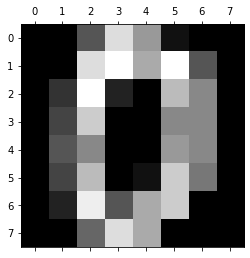

In [5]:
# Load digits dataset
data = load_digits()

# Plot example digit
plt.gray() 
plt.matshow(data.images[0]) 
plt.show()

In [7]:
# Get data X and class labels y
X = data.data
y = data.target
X.shape, y.shape

((1797, 64), (1797,))

In [8]:
# Print example
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [9]:
# Split data in training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, shuffle=True, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((1257, 64), (540, 64), (1257,), (540,))

## KNN

In [10]:
# Paramter grid for knn
param_grid_knn = {
    'clf__n_neighbors': range(1, 10),
    'clf__weights': ['uniform', 'distance'],
    'clf__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Build pipeline
pipe_knn = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', KNeighborsClassifier())
])

# Apply grid search cross validation
grid_search = GridSearchCV(pipe_knn, param_grid_knn).fit(X_train, y_train)

# Show best estimator
grid_search.best_params_

{'clf__metric': 'euclidean', 'clf__n_neighbors': 1, 'clf__weights': 'uniform'}

In [11]:
# Show score of best estimator
grid_search.best_score_

0.983295389869095

In [13]:
def conf_mat(y_true, y_pred, title='Confusion matrix', target_names=None):
    """Plot confusion matrix as heatmap.
    
    Parameters
    ----------
        y_true : ndarray of shape (n_samples,)
            True labels.
        y_pred : ndarray of shape (n_samples,)
            Predicted labels.
        target_names : list of strings
            Names of the labels.
    """
    df_cm = pd.DataFrame(confusion_matrix(y_true, y_pred), target_names,
                         target_names)
    sn.heatmap(df_cm, annot=True, cmap='YlGnBu', fmt='g')
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    plt.title(title)

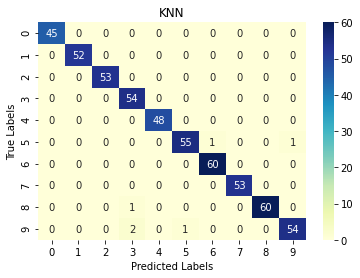

In [14]:
# Plot confusion matrix as heatmap
conf_mat(y_test, grid_search.predict(X_test), "KNN", data.target_names)

## Logistic regression

In [50]:
# Paramter grid for knn
param_grid_logreg = {
    'clf__C': [0.5, 1, 5, 10],
}

# Build pipeline
pipe_logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

# Apply grid search cross validation
grid_search = GridSearchCV(pipe_logreg, param_grid_logreg, n_jobs=-1).fit(
    X_train, y_train)

# Show best estimator
grid_search.best_params_

{'clf__C': 0.5}

In [51]:
# Show score of best estimator
grid_search.best_score_

0.9697653829127934

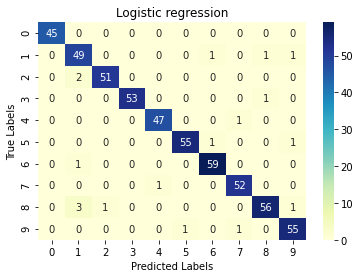

In [52]:
# Plot confusion matrix as heatmap
conf_mat(y_test, grid_search.best_estimator_.predict(X_test),
         "Logistic regression", data.target_names)

# SVM

In [58]:
# Paramter grid for knn
param_grid_svm = {
    'clf__C': [0.5, 1, 5, 10],
}

# Build pipeline
pipe_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(kernel='linear'))
])

# Apply grid search cross validation
grid_search = GridSearchCV(pipe_svm, param_grid_svm, n_jobs=-1).fit(
    X_train, y_train)

# Show best estimator
grid_search.best_params_

{'clf__C': 0.5}

In [59]:
# Show score of best estimator
grid_search.best_score_

0.9777240245367735

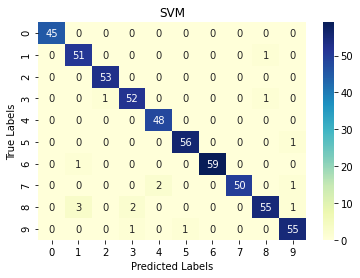

In [60]:
# Plot confusion matrix as heatmap
conf_mat(y_test, grid_search.best_estimator_.predict(X_test),
         "SVM", data.target_names)